In [1]:
!pip install earthpy
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 610.6 kB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54609 sha256=3776ada20fbacc273cd333dcf73e6920a084d398a6cc8067e50faec55447f31b
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [2]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
c2011_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l5-1/Year_2011"
c2010_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l5-1/Year_2010"
c2009_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l5-1/Year_2009"
c2008_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l5-1/Year_2008"
c2007_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l5-1/Year_2007"
c2006_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l5-1/Year_2006"
c2005_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l5-1/Year_2005"

cpath_list = [c2011_path, c2010_path, c2009_path, c2008_path, c2007_path,
              c2006_path, c2005_path]

In [4]:
c2011 = os.listdir(c2011_path)
c2010 = os.listdir(c2010_path)
c2009 = os.listdir(c2009_path)
c2008 = os.listdir(c2008_path)
c2007 = os.listdir(c2007_path)
c2006 = os.listdir(c2006_path)
c2005 = os.listdir(c2005_path)

#clipped_year = [c2011, c2010, c2009, c2008, c2007, c2006, c2005, c2004, c2003, c2002, c2001, c2000]
clipped_year = [c2011, c2010, c2009, c2008, c2007, c2006, c2005]

In [5]:
months = ("06", "07", "08", "09" ,"10", "11")
for year in clipped_year:
    for band in year:
        if band[21:23] in months:
            continue
        else:
            year.remove(band)

In [6]:
c2006

['LT05_L2SP_176034_20060917_20200831_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20060823_20200831_02_T1_SR_B3.TIF',
 'LT05_L2SP_176033_20060731_20200831_02_T1_SR_B4.TIF',
 'LT05_L2SP_177033_20060823_20200831_02_T1_SR_B3.TIF',
 'LT05_L2SP_177033_20060604_20200901_02_T1_SR_B4.TIF',
 'LT05_L2SP_176034_20060731_20200831_02_T1_SR_B3.TIF',
 'LT05_L2SP_176033_20060917_20200831_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20060807_20200831_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20060620_20200901_02_T1_SR_B4.TIF',
 'LT05_L2SP_177033_20060823_20200831_02_T1_SR_B4.TIF',
 'LT05_L2SP_176034_20060917_20200831_02_T1_SR_B3.TIF',
 'LT05_L2SP_177033_20060908_20200831_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20060604_20200901_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20060620_20200901_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20060604_20200901_02_T1_SR_B3.TIF',
 'LT05_L2SP_176034_20060731_20200831_02_T1_SR_B4.TIF',
 'LT05_L2SP_177033_20060604_20200901_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20060807_20200831_02_T1_SR_B3.TIF',
 'LT05_L2S

In [7]:
b4list2011 = []
b3list2011 = []

b4list2010 = []
b3list2010 = []

b4list2009 = []
b3list2009 = []

b4list2008 = []
b3list2008 = []

b4list2007 = []
b3list2007 = []

b4list2006 = []
b3list2006 = []

b4list2005 = []
b3list2005 = []

b4list = [b4list2011, b4list2010, b4list2009, b4list2008, b4list2007,
          b4list2006, b4list2005]
b3list = [b3list2011, b3list2010, b3list2009, b3list2008, b3list2007,
          b3list2006, b3list2005]

In [8]:
def whichband(b4lst, b3lst, lst):
    for i in lst:
        if i.endswith("B4.TIF"):
            b4lst.append(i)
        elif i.endswith("B3.TIF"):
            b3lst.append(i)
        else:
            print("Atlandı")
            
    b4lst.sort()
    b3lst.sort()

In [9]:
for i in range(len(clipped_year)):
    whichband(b4list[i], b3list[i], clipped_year[i])

In [10]:
b4list[0]

['LT05_L2SP_176033_20110729_20200820_02_T1_SR_B4.TIF',
 'LT05_L2SP_177033_20110821_20200820_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20110821_20200820_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20110906_20200820_02_T1_SR_B4.TIF',
 'LT05_L2SP_178034_20110625_20200822_02_T1_SR_B4.TIF',
 'LT05_L2SP_178034_20110711_20200822_02_T1_SR_B4.TIF',
 'LT05_L2SP_178034_20110727_20200822_02_T1_SR_B4.TIF',
 'LT05_L2SP_178034_20110828_20200820_02_T1_SR_B4.TIF']

In [11]:
os.mkdir("./Band4")
os.mkdir("./Band3")

In [12]:
def merging(data, ypath, wband, year):
    arrays = []
    for i in data:
        path = os.path.join(ypath, i)
        band = rxr.open_rasterio(path, masked=True).squeeze()
        arrays.append(band)
    
    merged = merge_arrays(arrays)
    if wband == "_B4.TIF":
        outpath = os.path.join("./Band4", "Havza_"+str(year)+"_B4.TIF")
    elif wband == "_B5.TIF":
        outpath = os.path.join("./Band5", "Havza_"+str(year)+"_B5.TIF")
    elif wband == "_B3.TIF":
        outpath = os.path.join("./Band3", "Havza_"+str(year)+"_B3.TIF")
    merged.rio.to_raster(outpath)

In [13]:
year = 2005
for i in range(len(b4list)):
    merging(b4list[i], cpath_list[i], "_B4.TIF", year)
    merging(b3list[i], cpath_list[i], "_B3.TIF", year)

    print("Yıl {} yapıldı.".format(str(year)))
    year+=1
    time.sleep(2)

Yıl 2005 yapıldı.
Yıl 2006 yapıldı.
Yıl 2007 yapıldı.
Yıl 2008 yapıldı.
Yıl 2009 yapıldı.
Yıl 2010 yapıldı.
Yıl 2011 yapıldı.


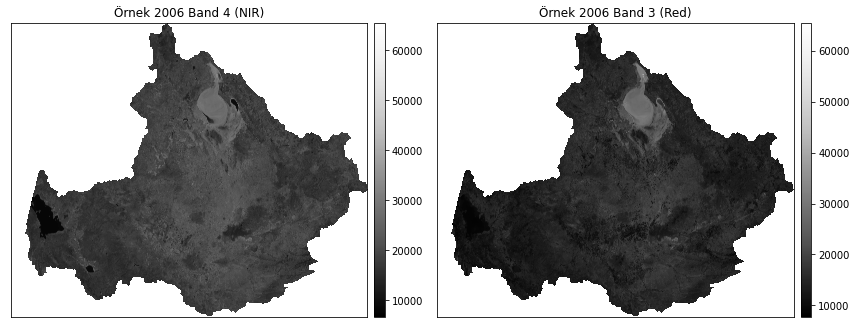

In [14]:
dene4 = rxr.open_rasterio("./Band4/Havza_2006_B4.TIF", masked = True).squeeze()
dene3 = rxr.open_rasterio("./Band3/Havza_2006_B3.TIF", masked = True).squeeze()
deneler = np.array([dene4, dene3])
ep.plot_bands(deneler, cols = 2, title = ["Örnek 2006 Band 4 (NIR)", "Örnek 2006 Band 3 (Red)"])
plt.show()

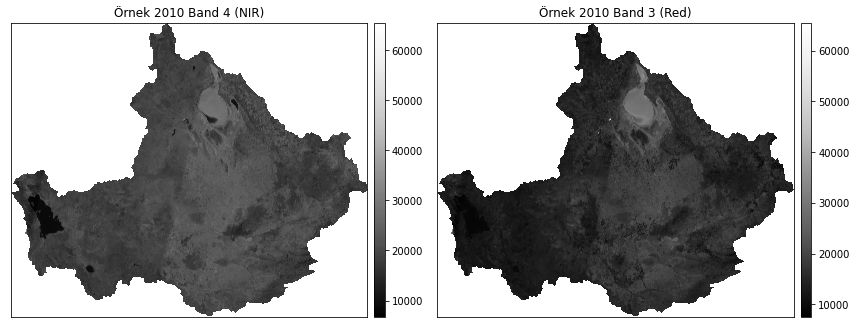

In [15]:
dene4 = rxr.open_rasterio("./Band4/Havza_2010_B4.TIF", masked = True).squeeze()
dene3 = rxr.open_rasterio("./Band3/Havza_2010_B3.TIF", masked = True).squeeze()
deneler = np.array([dene4, dene3])
ep.plot_bands(deneler, cols = 2, title = ["Örnek 2010 Band 4 (NIR)", "Örnek 2010 Band 3 (Red)"])
plt.show()